In [ ]:

#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib


In [ ]:
df = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


Text(0.5, 1.0, 'Stroke Occurrence (Target)')

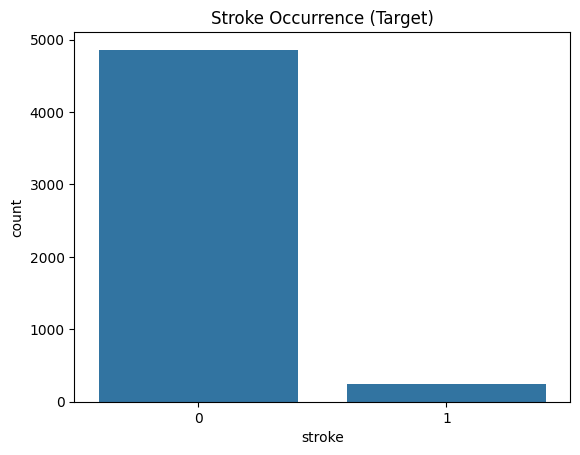

In [ ]:
sns.countplot(x='stroke', data=df)
plt.title("Stroke Occurrence (Target)")


<Axes: >

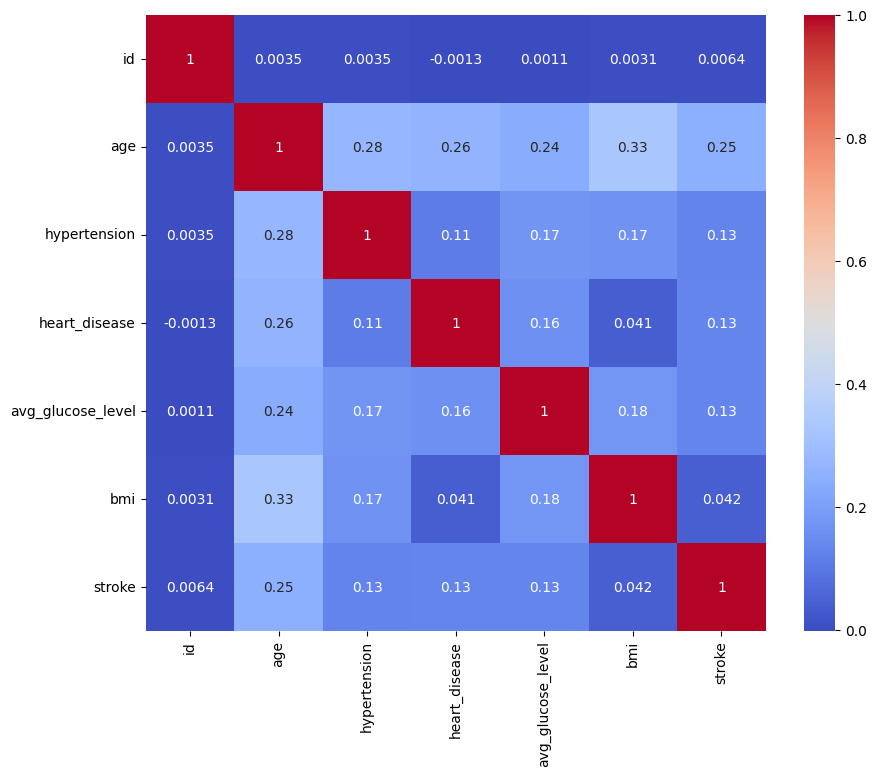

In [ ]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')


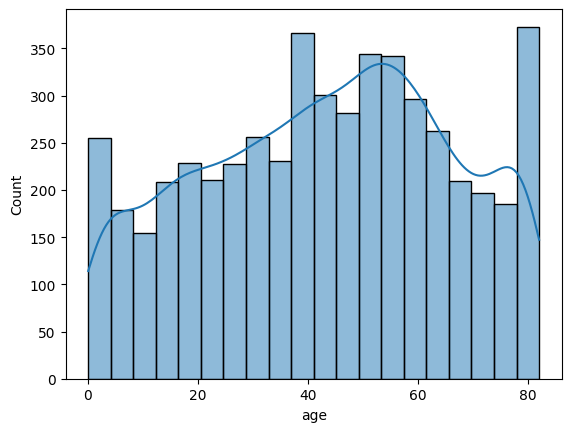

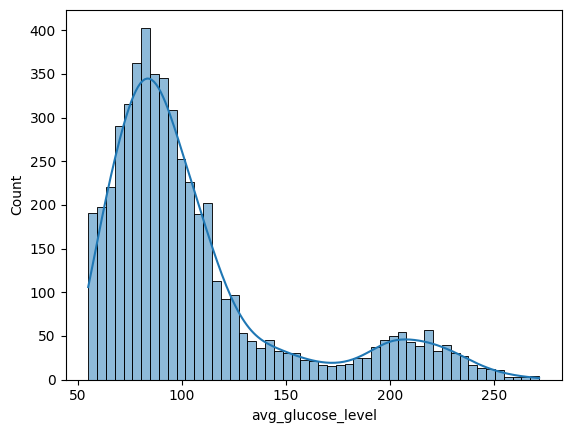

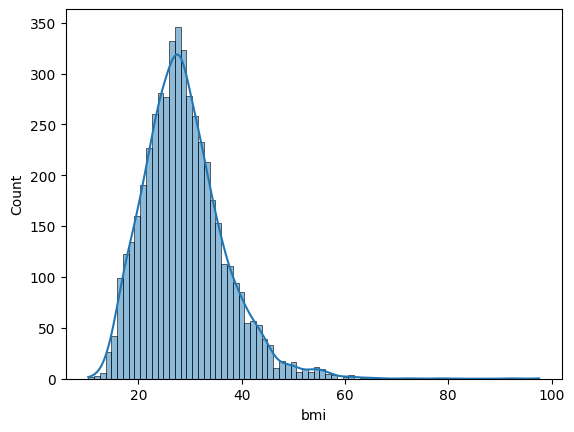

In [ ]:
for col in ['age', 'avg_glucose_level', 'bmi']:
    plt.figure()
    sns.histplot(df[col], kde=True)


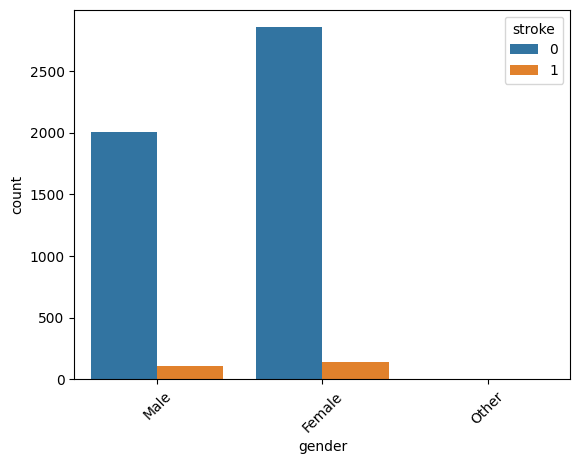

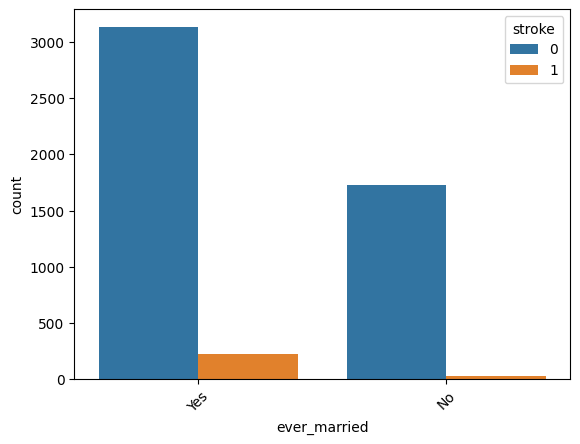

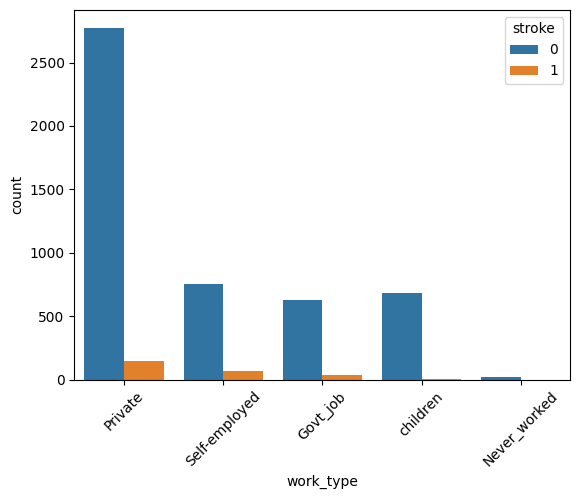

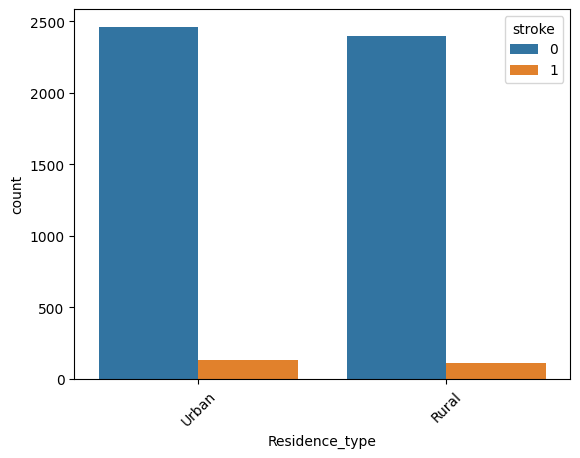

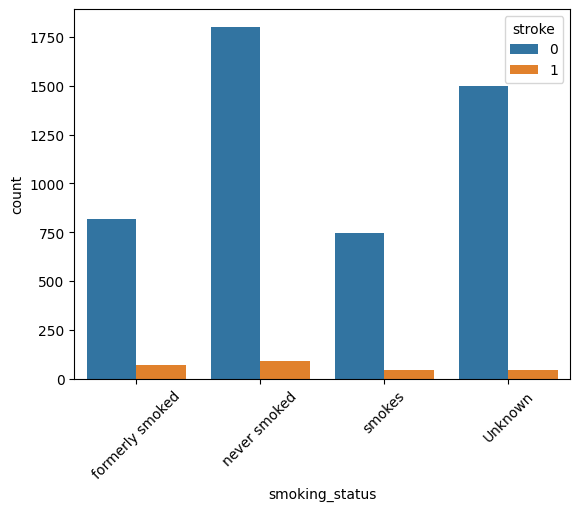

In [ ]:
cat_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in cat_cols:
    plt.figure()
    sns.countplot(x=col, hue='stroke', data=df)
    plt.xticks(rotation=45)


In [ ]:
df.drop('id', axis=1, inplace=True)


In [ ]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)


/tmp/ipython-input-12-749786099.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)


In [ ]:
df['gender'].replace('Other', np.nan, inplace=True)
df.dropna(inplace=True)

encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])


/tmp/ipython-input-13-390357070.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace('Other', np.nan, inplace=True)


In [ ]:
X = df.drop('stroke', axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


Accuracy: 0.949119373776908
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



Text(50.722222222222214, 0.5, 'Actual')

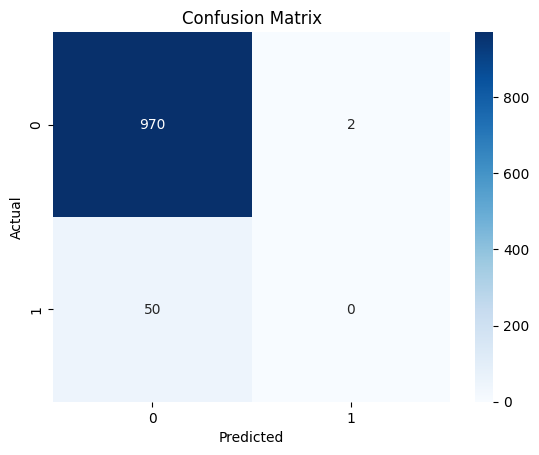

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")


In [ ]:
joblib.dump(model, 'stroke_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [ ]:
from google.colab import files
files.download('stroke_model.pkl')
files.download('scaler.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 K-Nearest Neighbors Results
Accuracy: 0.9481409001956947
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.20      0.02      0.04        50

    accuracy                           0.95      1022
   macro avg       0.58      0.51      0.50      1022
weighted avg       0.92      0.95      0.93      1022



Text(50.722222222222214, 0.5, 'Actual')

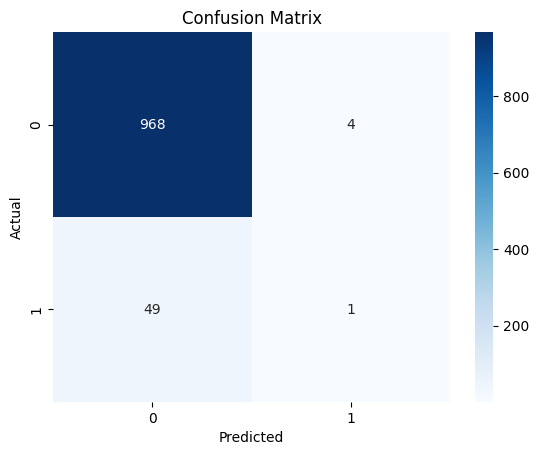

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)

# Evaluation
print("\n K-Nearest Neighbors Results")
print("Accuracy:", accuracy_score(y_test, knn_preds))
print("Classification Report:\n", classification_report(y_test, knn_preds))

sns.heatmap(confusion_matrix(y_test, knn_preds), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

🔹 Naive Bayes Results
Accuracy: 0.8649706457925636
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93       972
           1       0.16      0.42      0.23        50

    accuracy                           0.86      1022
   macro avg       0.56      0.65      0.58      1022
weighted avg       0.93      0.86      0.89      1022



Text(50.722222222222214, 0.5, 'Actual')

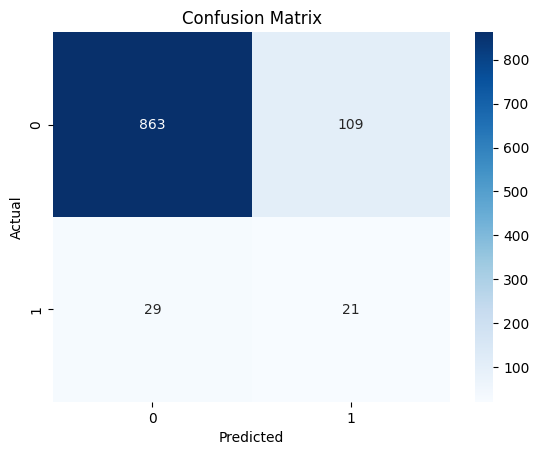

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)

print("Naive Bayes Results")
print("Accuracy:", accuracy_score(y_test, nb_preds))
print("Classification Report:\n", classification_report(y_test, nb_preds))

sns.heatmap(confusion_matrix(y_test, nb_preds), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")


In [ ]:

# Predictions
y_pred = model.predict(X_test)
knn_preds = knn_model.predict(X_test)
nb_preds = nb_model.predict(X_test)

# Accuracy scores
model_scores = {
    "Random Forest": accuracy_score(y_test, y_pred),
    "K-Nearest Neighbors": accuracy_score(y_test, knn_preds),
    "Naive Bayes": accuracy_score(y_test, nb_preds)
}


In [ ]:
import plotly.express as px
import pandas as pd

# Data for plotly
scores_df = pd.DataFrame({
    'Model': list(model_scores.keys()),
    'Accuracy': list(model_scores.values())
})

# Interactive bar chart
fig = px.bar(
    scores_df,
    x='Model',
    y='Accuracy',
    color='Model',
    text='Accuracy',
    title=' Interactive Model Accuracy Comparison',
    color_discrete_sequence=px.colors.qualitative.Safe
)

fig.update_traces(texttemplate='%{text:.2%}', textposition='outside')
fig.update_layout(yaxis=dict(range=[0, 1]), showlegend=False)
fig.show()


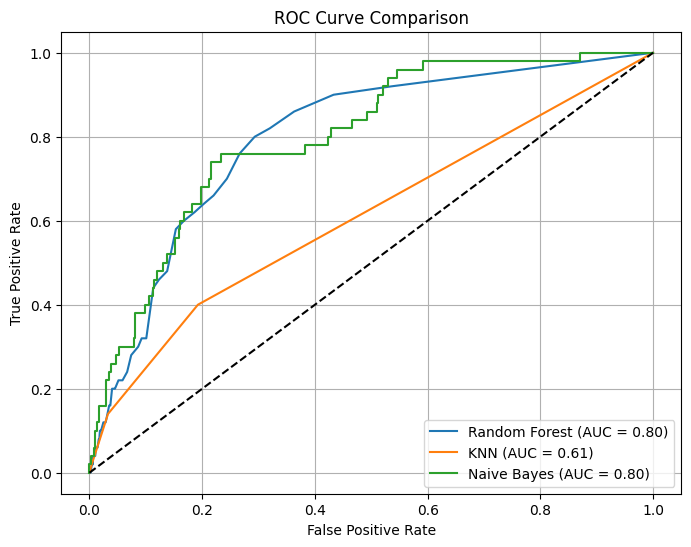

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Plot function
def plot_roc_curve(model, X_test, y_test, label):
    try:
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc_score = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{label} (AUC = {auc_score:.2f})")
    except Exception as e:
        print(f" Could not plot for {label}: {e}")

# Plot ROC for all 3 models
plt.figure(figsize=(8, 6))
plot_roc_curve(model, X_test, y_test, "Random Forest")   # ← use 'model' here
plot_roc_curve(knn_model, X_test, y_test, "KNN")
plot_roc_curve(nb_model, X_test, y_test, "Naive Bayes")

# Reference line
plt.plot([0, 1], [0, 1], 'k--')

# Labels and legend
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# RANDOM FOREST AND NAIVE BAYES HAS BETTER ACCURACY